In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataDir='drive/MyDrive/Colab Notebooks/samolet/data/train/images/'

In [4]:
image_names = []
for filename in os.listdir(dataDir):
  if 'jpg' in filename.lower():
    image_names.append(filename)
descr = pd.DataFrame(data={
    'file': image_names,
    'target': None})
descr['target'] = descr['target'] - 1

In [5]:
descr.head()

,file,target
0,0000012931building.jpg,NaN
1,0000005494building.jpg,NaN
2,IMG_20221108_164626_735.jpg,NaN
3,0000035088building.jpg,NaN
4,0000012408building.jpg,NaN


Функция для поиска контуров

In [6]:
def preprocessing(path: str):
  img_in = cv2.imread(path)
  img = img_in#cv2.resize(img_in, (512, 512), interpolation = cv2.INTER_AREA)
  img_1 = img
  imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgray = cv2.convertScaleAbs(imgray, alpha=-2.5, beta=80)
  ret, thresh = cv2.threshold(imgray, 127, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  #img_contours = np.uint8(np.zeros((img.shape[0],img.shape[1])))
  #cont = cv2.drawContours(img, contours, -1, (255,255,0), 1)
  rect = []
  for c in contours:
    approx = cv2.approxPolyDP(c, 0.1*cv2.arcLength(c, True), True)
    if len(approx) == 4 and cv2.arcLength(c, True) >= .2 * img_in.shape[0]:
      x, y, w, h = cv2.boundingRect(c)
      rect.append([x, y, w, h])
      for r in rect:
        boxes = cv2.rectangle(img_1, (r[0], r[1]), (r[0]+r[2], r[1]+r[3]), (0,255,0), 3)
    else:
      boxes = img_1
  return boxes, rect#torch.tensor(cont, dtype=torch.float32), cont, img_in

Функция для обрезки ячеек

In [7]:
def cut(path: str, rectangles: list):
  image = cv2.imread(path)
  cells = []
  for r in rectangles:
    cells.append(image[r[1]:r[1]+r[3], r[0]:r[0]+r[2]])
  return cells

In [14]:
path_list = []
box_list = []
for i in np.random.randint(0, descr.shape[0], 5):
  path_list.append('drive/MyDrive/Colab Notebooks/samolet/data/train/images/' + descr['file'][i])

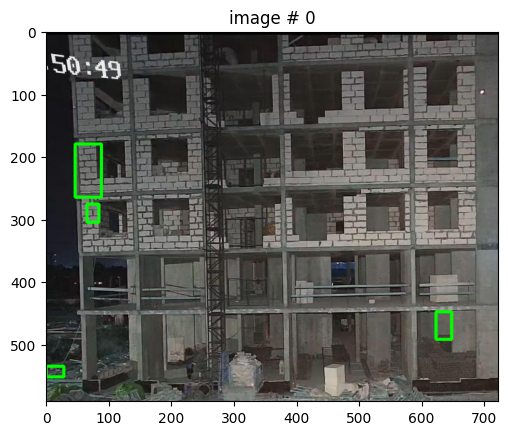

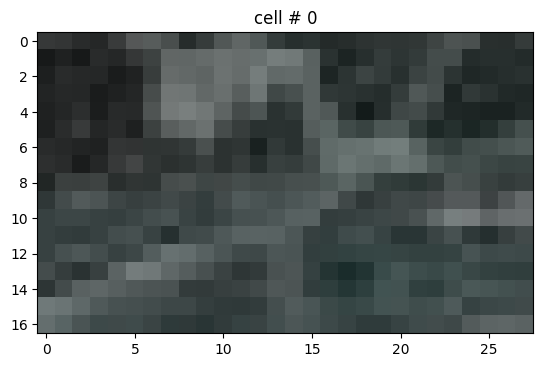

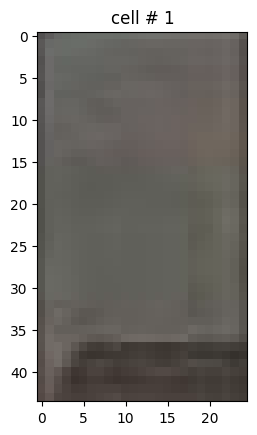

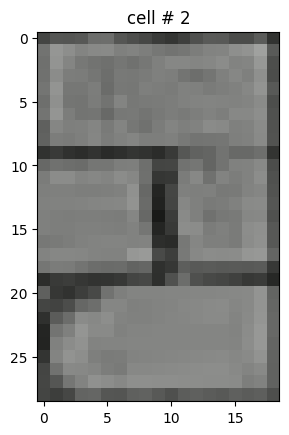

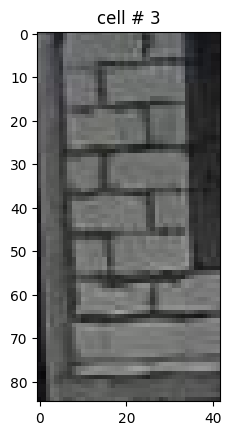

___________-


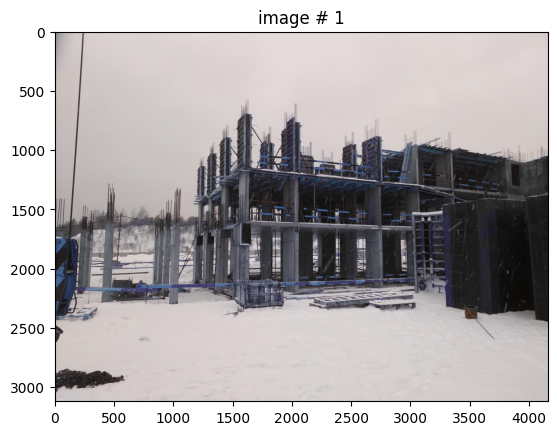

___________-


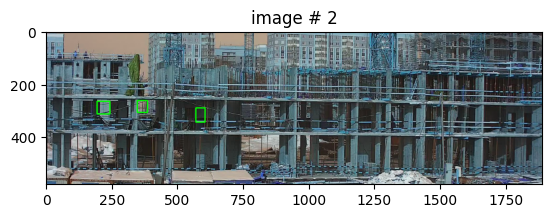

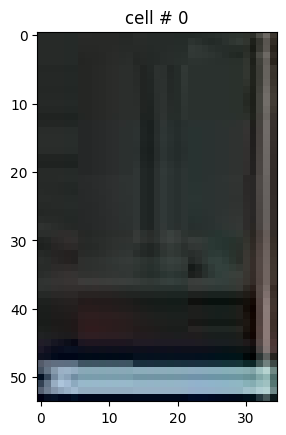

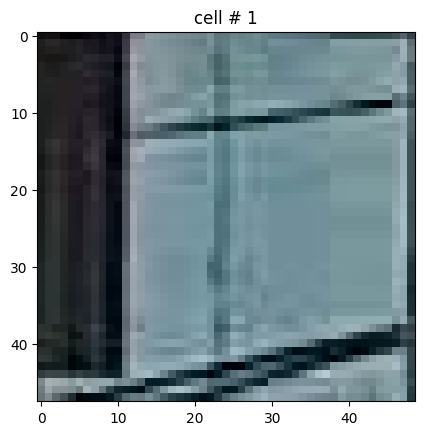

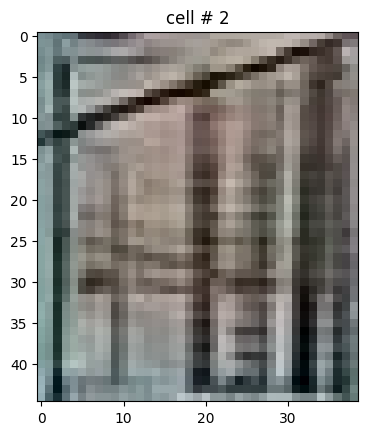

___________-


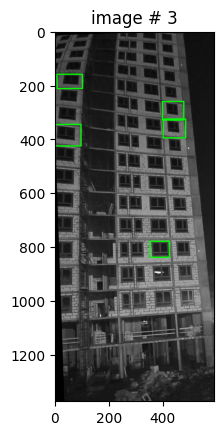

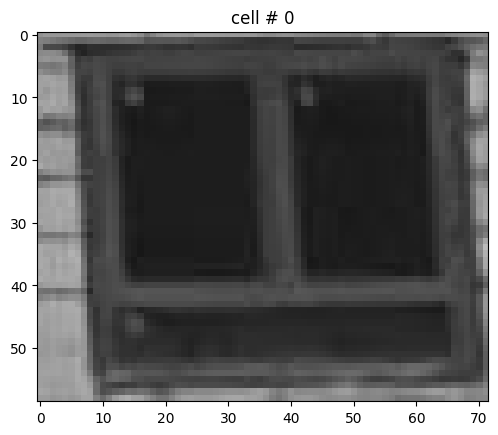

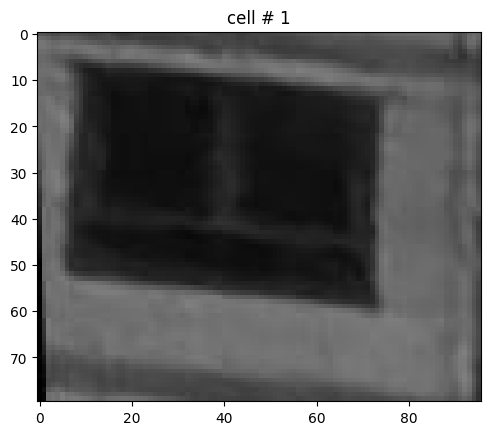

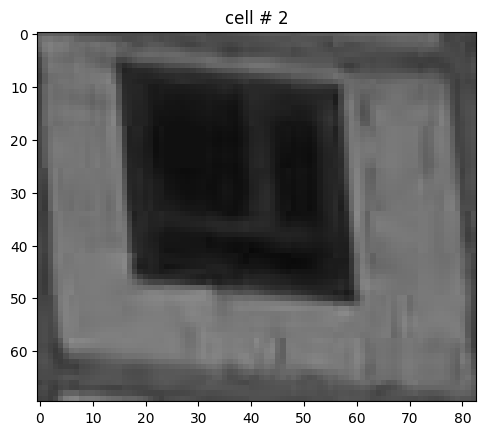

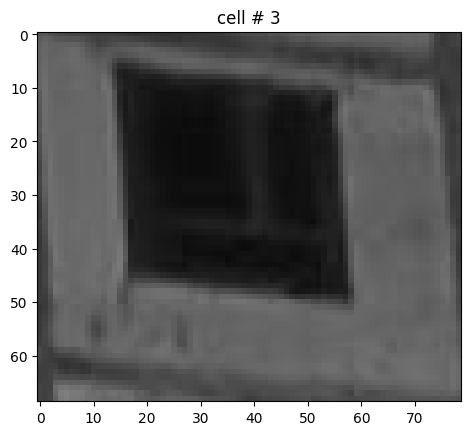

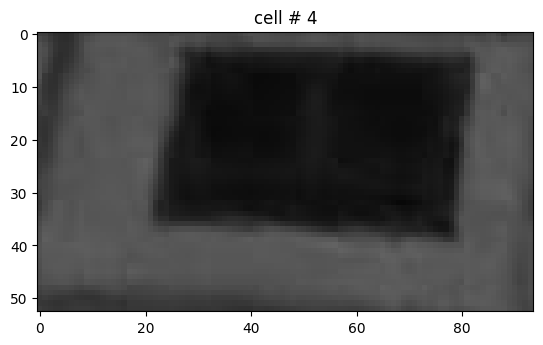

___________-


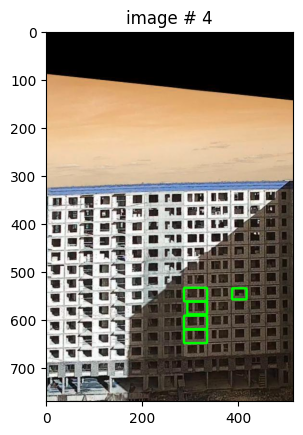

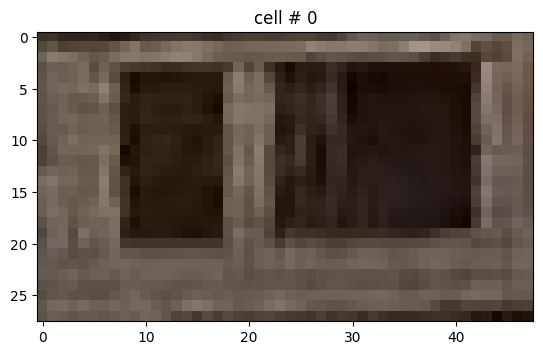

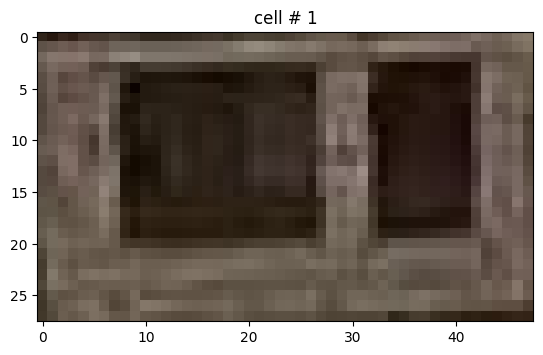

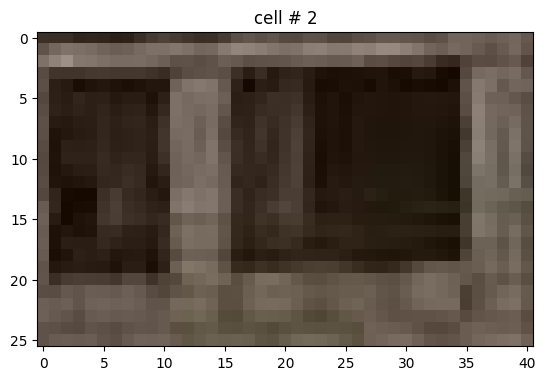

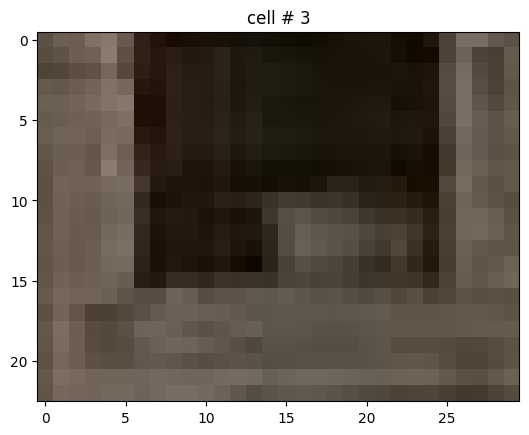

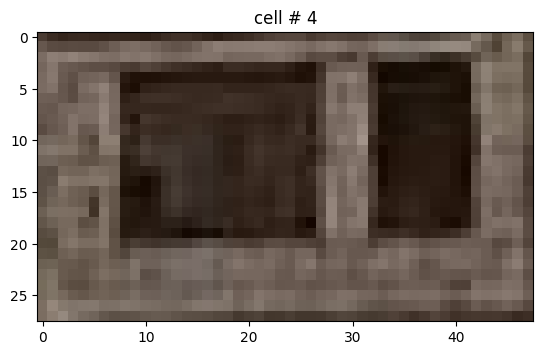

___________-


In [15]:
for i in range(len(path_list)):
  plt.title(f'image # {i}')
  plt.imshow(preprocessing(path_list[i])[0])
  plt.show()
  j = 0
  for c in cut(path_list[i], preprocessing(path_list[i])[1]):
    plt.title(f'cell # {j}')
    plt.imshow(c)
    plt.show()
    j += 1
  print('___________-')

Как будто бы что-то видим, посмотрим, что дальше с этим можно сделать.